# CNN model

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os  # iterate over directories
import cv2  # Image operations

## Reading the DataFrame

This is a (7462, 7), with the circuits, freq, Z, Circuit, Parameters, Z_real, Z_imag, and image_name. The classification ID must be added and it's done by using the enumerate(unique()) method.


In [2]:
eis_data = pd.read_csv("train_data_images.csv", index_col=0)
classes_dict = {cl:i for i, cl in enumerate(eis_data["Circuit"].unique())}
eis_data["category_id"] = eis_data["Circuit"].apply(lambda x: classes_dict[x])

## Plotting one image

Let's see what is the shape of one image, since there is a memory problem, it is important to try reducing the shape of an image. For this, the following algorithm is used:

1. Define the path where the images are stored
2. iterate over the dict where the categories are defined
3. for each category, acces and iterate over each folder category
4. Read each image, it can be done in gray scale or full color. Consider that gray scale will give a shape in 1D, but in color, it will generate a 3D due to the RGB format
5. Print the image size and then plot one

image size:  (224, 224, 3)


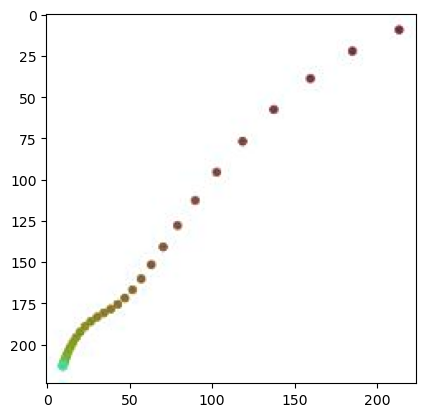

In [14]:
DATADIR ="./images"
for category in classes_dict:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_ANYCOLOR)
        print('image size: ', img_array.shape)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


The images have a shape of 224x224, which can be a bit big, thus, it can be reduced to 64, with the following code. however, if the model shows a bad result, consider increase this size.

new image size:  (128, 128, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

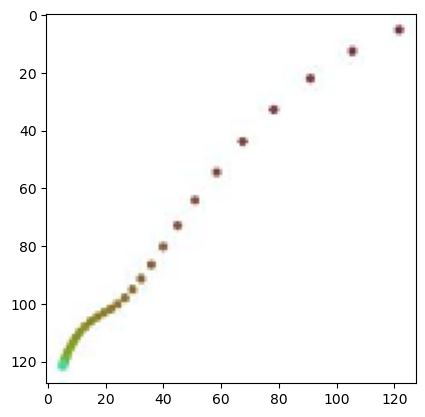

In [21]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print('new image size: ', new_array.shape)
plt.imshow(new_array, cmap='gray')
plt.show

## Training data

Lets define now the training data. For this, the algorithm explained above is usde to generate a list with the entire dataset (7462 images) but the image size is decreased to 64x64, before it was 224x224. The List is 2D, and will store the image resized and the category number. The cv2 library is used for the resize and reading of images.

In [16]:
training_data = []
IMG_SIZE = 128

def create_training_data():
    for category in classes_dict:
        path = os.path.join(DATADIR, category)
        class_num = classes_dict[category]
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

The list must be converted into a numpy array, so first, it will be shuffled and then covnerted into an array.

In [17]:
import random

random.shuffle(training_data)

In [18]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [19]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)#.astype(np.uint8)
y = np.array(y)#.astype(np.uint8)

In [20]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()